In [7]:
import pickle

from pathlib import Path
from matplotlib import pyplot as plt

import variables as v
import optuna

In [8]:
_ROOT = Path('..') / 'final'
sr = 16000
roots = [v.CCS_Root, v.PRIMATES_Root]
ext = 'png'
study_ext = '.pkl'
study_name = 'FINAL_VisualTransformer_200_CCSLibrosaDatamodule_best_379_score_0.7241663932800293'

In [9]:
with (_ROOT / (study_name + study_ext)).open('rb') as f:
    study = pickle.load(f)

In [10]:
print(study.best_params)
best_params = list(study.best_params.keys())

{'scheduler': 'LambdaLR', 'lr_scheduler_parameter': 0.9, 'batch_size': 25, 'target_mel_length_in_seconds': 1.3, 'random_apply_chance': 0.1, 'loudness_ratio': 0.30000000000000004, 'shift_ratio': 0.0, 'noise_ratio': 0.30000000000000004, 'mask_ratio': 0.1, 'lr': 0.0004120756353355384, 'dropout': 0.15000000000000002, 'lat_dim': 4, 'sampler': 'WeightedRandomSampler', 'mlp_dim': 5, 'head_dim': 4, 'patch_size': 18, 'attn_depth': 10, 'heads': 16, 'embedding_size': 60}


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<ipython-input-11-67bcc737c39c>:22: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  ax = optuna.visualization.matplotlib.plot_param_importances(study, params=[x for x in best_params if x not in ['sampler', '']], target_name='UAR') # [best_params[-2], best_params[17]])


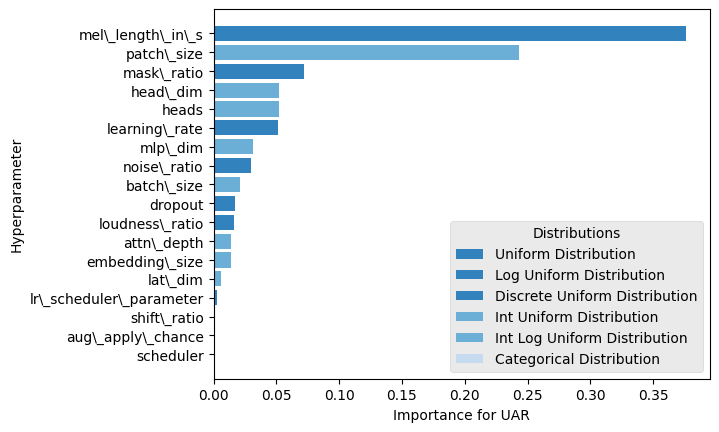

In [11]:
print(plt.style.available)
plt.style.use('default')

# print(plt.rcParams.keys())

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
# plt.rcParams.update(tex_fonts)

Path('figures').mkdir(exist_ok=True)

ax = optuna.visualization.matplotlib.plot_param_importances(study, params=[x for x in best_params if x not in ['sampler', '']], target_name='UAR') # [best_params[-2], best_params[17]])
ax.set_title("")

labels = [item.get_text() if item.get_text() != 'target_mel_length_in_seconds' else 'mel_length_in_s' for item in ax.get_yticklabels()]
labels = [item if item != 'random_apply_chance' else 'aug_apply_chance' for item in labels]
labels = [item if item != 'lr' else 'learning_rate' for item in labels]

labels = [item.replace('_', '\_') for item in labels]

ax.set_yticklabels(labels)

plt.savefig('figures/parameter_importance_vit.png')
plt.show()